# 1.0 Setup Path

In [22]:
import os

# os.chdir("../")

%pwd

'c:\\Users\\Hp\\Documents\\GitHub\\cattle-cvd-via-retina-imgs\\notebooks'

# 1.1 Import necessary Libraries

In [23]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1.2 Initialize Parameters

In [24]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=2
EPOCHS=10

directory_path = Path('../artifacts/dataset/retina_healthy_unhealthy')
directory_path

WindowsPath('../artifacts/dataset/retina_healthy_unhealthy')

# 1.3 Import Dataset

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1118 files belonging to 2 classes.


In [26]:
len(dataset)

35

# 1.4 Rename Classes

In [27]:
def rename_class_names(dataset, new_names):
    """
    Rename class names of a TensorFlow dataset.

    Args:
        dataset (tf.data.Dataset): The dataset whose class names need to be renamed.
        new_names (list): A list of new class names matching the order of original class names.

    Returns:
        dict: A mapping of old class names to new class names.
    """
    old_class_names = dataset.class_names
    if len(old_class_names) != len(new_names):
        raise ValueError("The number of new names must match the number of old class names.")
    
    # Create a mapping from old to new names
    name_mapping = dict(zip(old_class_names, new_names))
    
    # Update class names in the dataset (this is not persistent, used for reference)
    dataset.class_names = new_names  # Only for demonstration purposes, not supported directly in TensorFlow
    
    return name_mapping

# Example usage:
new_names = ['non-CVD', 'CVD']
class_name_mapping = rename_class_names(dataset, new_names)

print("Class name mapping:", class_name_mapping)
print("Updated class names:", dataset.class_names)

Class name mapping: {'0': 'non-CVD', '1': 'CVD'}
Updated class names: ['non-CVD', 'CVD']


In [28]:
class_names = dataset.class_names
class_names

['non-CVD', 'CVD']

# 1.5 Plot some of the Data

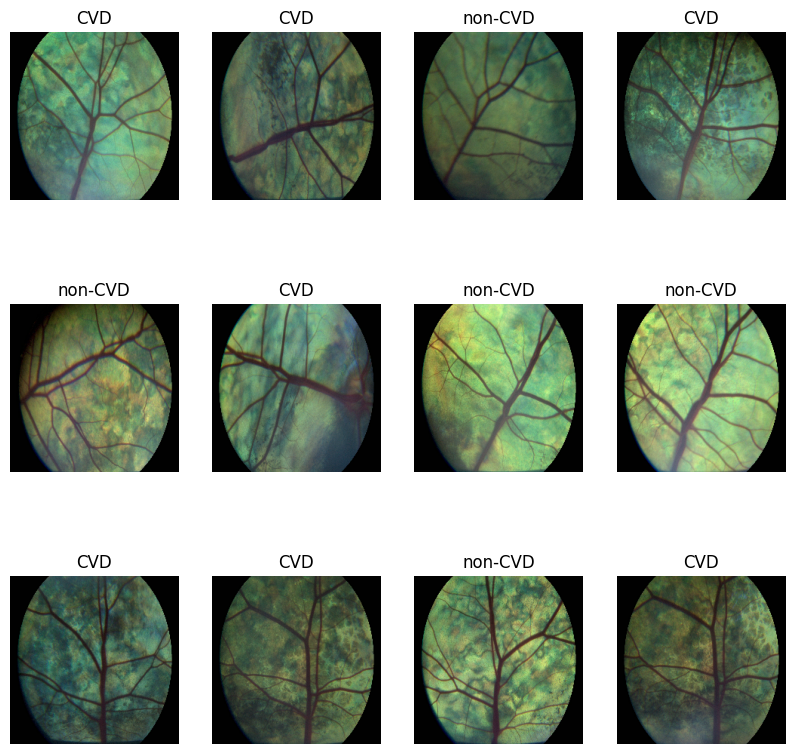

In [29]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")